In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import wave
import pyaudio
from audio2numpy import open_audio
from IPython.display import Audio
from scipy import signal

In [10]:
Fs = 48000
Ts = (1/Fs)
f = 1000
phi = 0

In [11]:
t = np.arange(0,3,1/Fs)

In [12]:
in1 = np.sin(np.pi*f*t+phi)

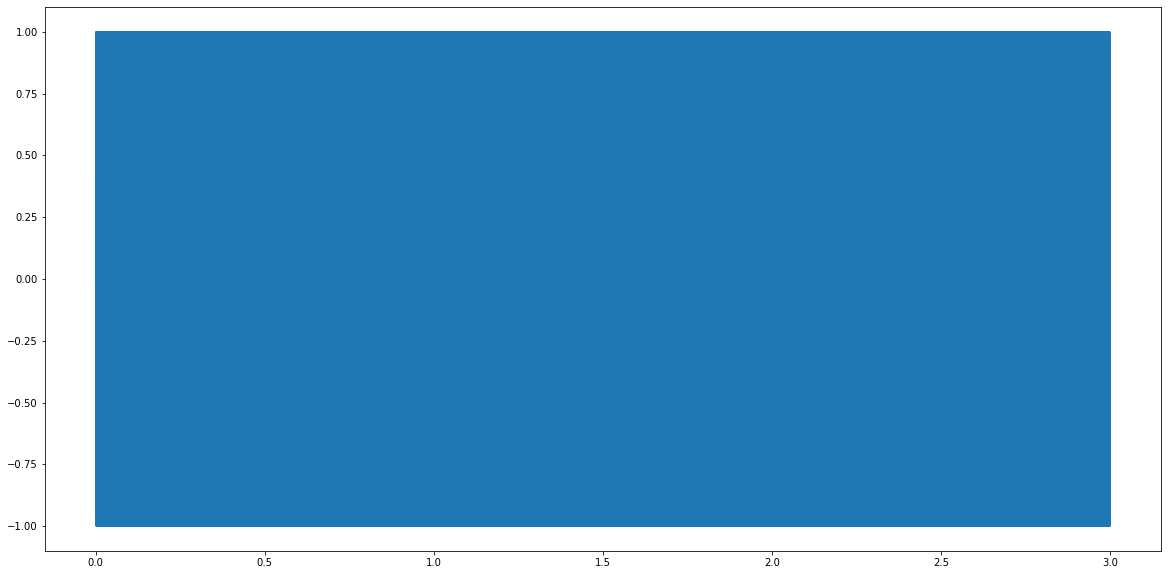

In [13]:
plt.plot(t,in1)

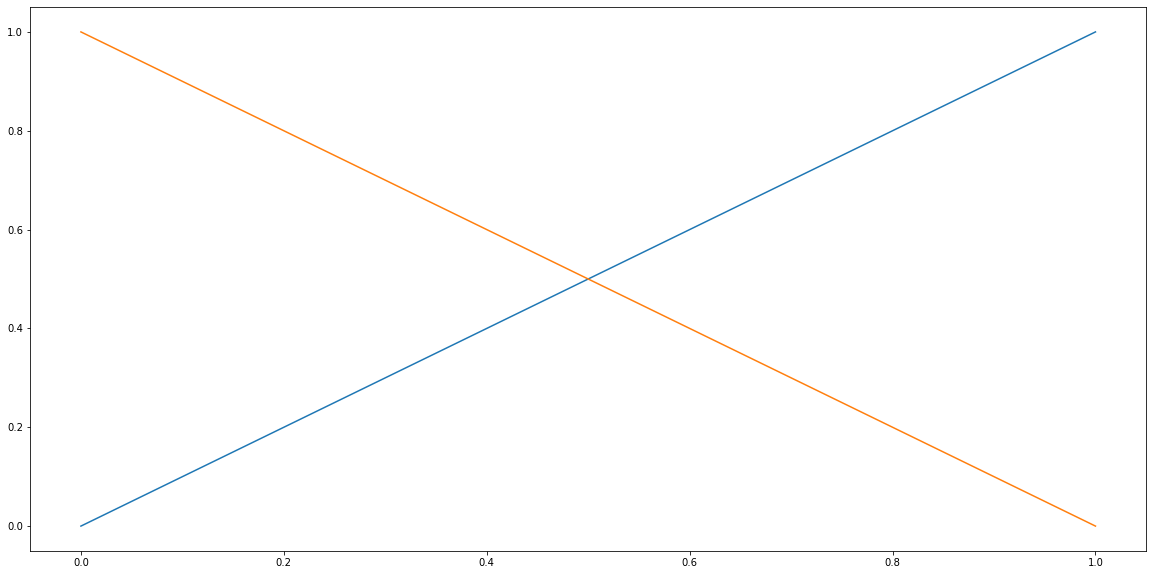

In [14]:
numOfSamples = 1*Fs
a = np.linspace(0,1,numOfSamples)
fadeIn = a
fadeOut = 1-a
plt.plot(a,fadeIn,a,fadeOut)


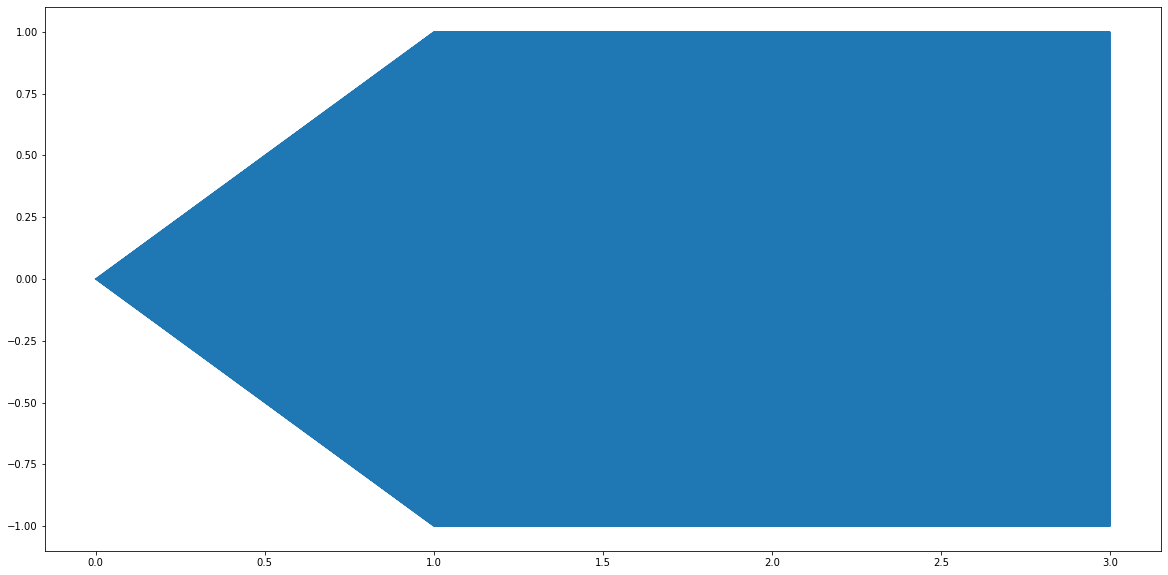

In [15]:
temp = in1
temp[:numOfSamples] = fadeIn * in1[:numOfSamples]

plt.plot(t,temp);

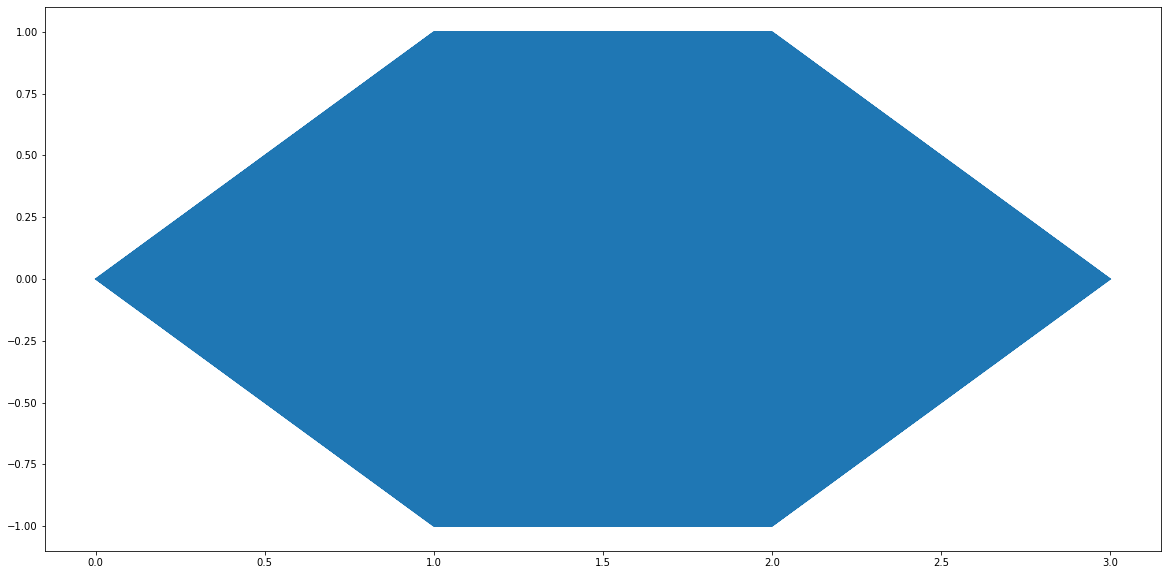

In [16]:
out = temp
out[-numOfSamples:] = fadeOut*in1[-numOfSamples:]
plt.plot(t,out)

In [17]:
Audio(data=out, rate=Fs)

### exp fade

In [22]:
Fs = 48000
Ts = (1/Fs)
f = 1000
phi = 0
t = np.arange(0,3,1/Fs)
in1 = np.sin(np.pi*f*t+phi)

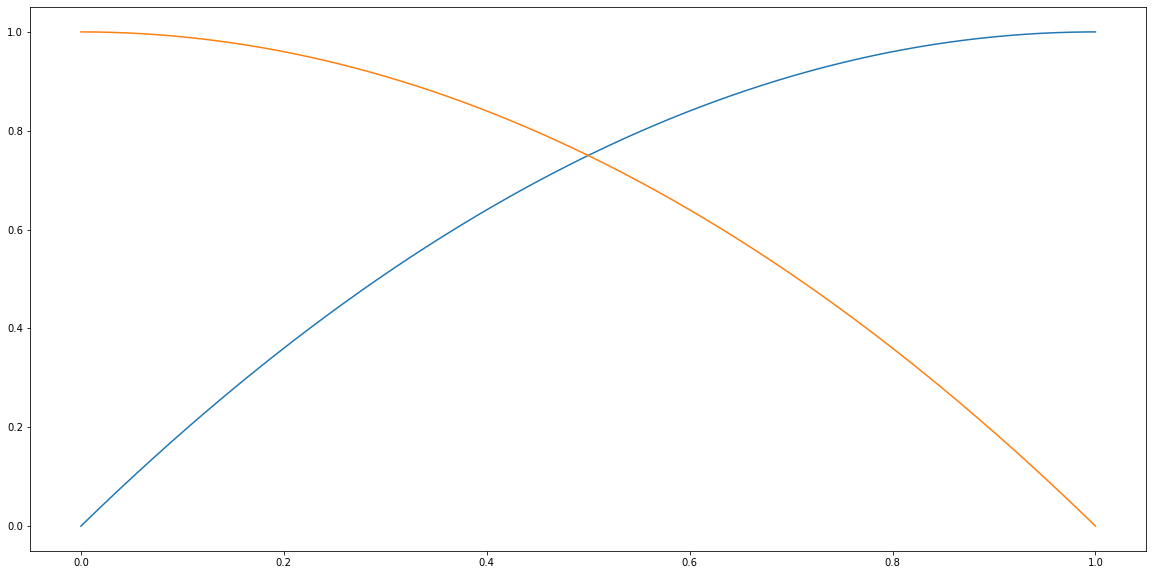

In [23]:
numOfSamples = 1*Fs
x = 2
aout = np.linspace(0,1,numOfSamples)
ain = np.linspace(1,0,numOfSamples)
fadeIn = 1-ain**x
fadeOut = 1-aout**x
plt.plot(aout,fadeIn,a,fadeOut)

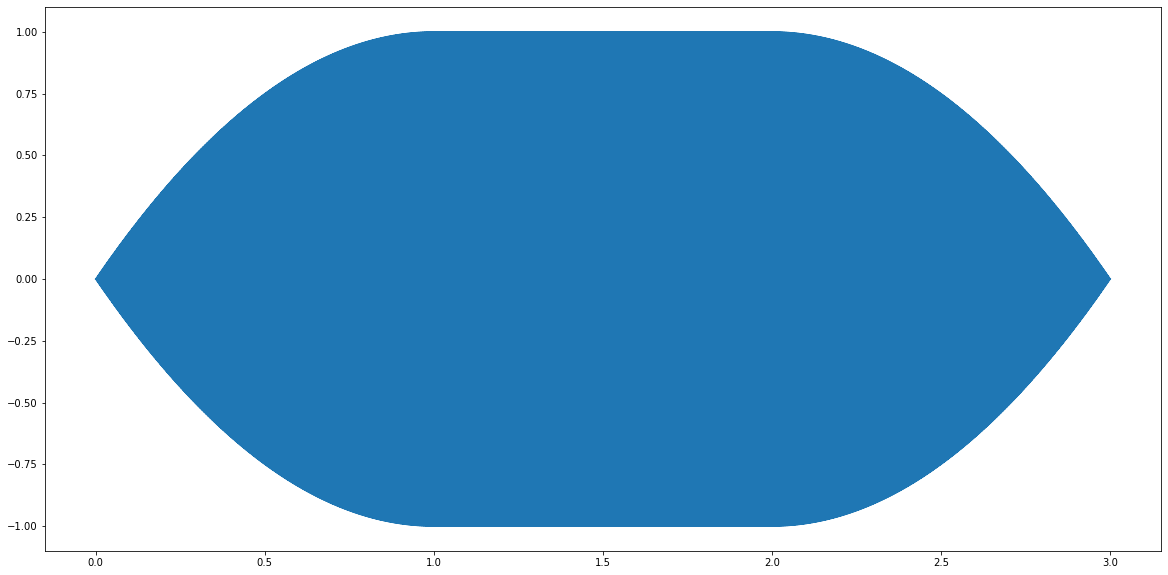

In [24]:
temp = in1
temp[:numOfSamples] = fadeIn * in1[:numOfSamples]
out = temp
out[-numOfSamples:] = fadeOut*in1[-numOfSamples:]
plt.plot(t,out)

In [25]:
Audio(data=out, rate=Fs)

### s-curve - concave/convex

In [30]:
Fs = 44100
Ts = (1/Fs)
f = 1000
phi = 0
t = np.arange(0,3,1/Fs)
in1 = np.sin(np.pi*f*t+phi)

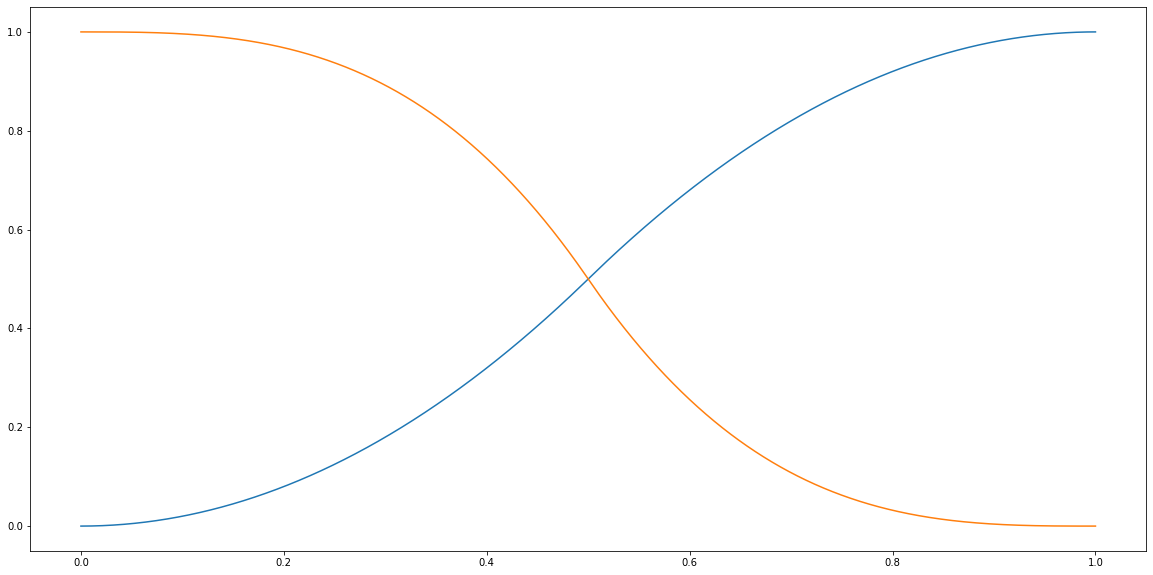

In [40]:
numOfSamples = 1*Fs

xin = 2
a = np.linspace(0,1,int(numOfSamples/2))
concaveIn = 0.5*a**xin
convexIn = 0.5*(1-(1-a)**xin) + 0.5

xout = 3

convexOut = 0.5*(1-a**xout) + 0.5
concaveOut = 0.5*(1-a)**xout

fadeIn = np.concatenate([concaveIn, convexIn])
fadeOut = np.concatenate([convexOut, concaveOut])

plt.plot(t[:Fs],fadeIn,t[:Fs],fadeOut)

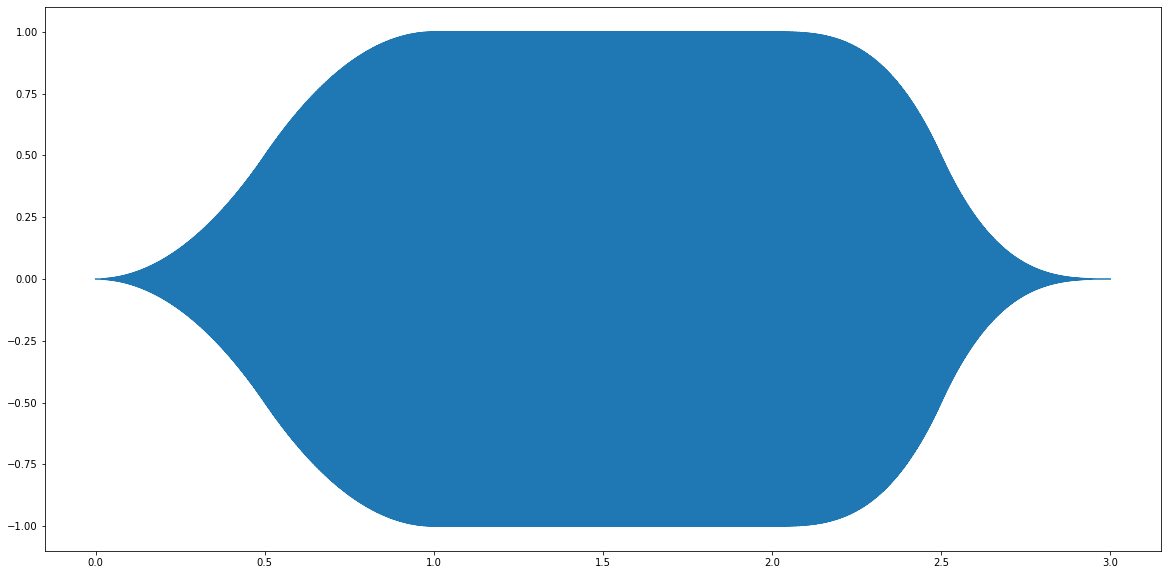

In [41]:
temp = in1
temp[:numOfSamples] = fadeIn * in1[:numOfSamples]
out = temp
out[-numOfSamples:] = fadeOut*in1[-numOfSamples:]
plt.plot(t,out)

In [42]:
Audio(data=out, rate=Fs)

### s-curve - sine

In [43]:
Fs = 44100
Ts = (1/Fs)
f = 1000
phi = 0
t = np.arange(0,3,1/Fs)
in1 = np.sin(np.pi*f*t+phi)

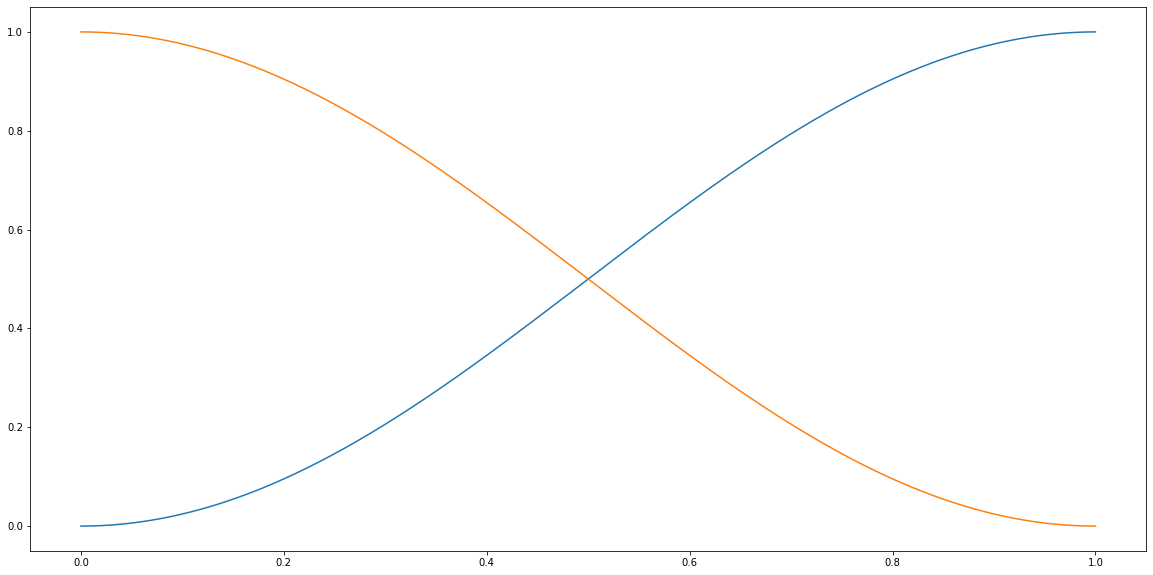

In [44]:
numOfSamples = 1*Fs

xin = 2
a = np.linspace(0,1,numOfSamples)
period = 2 # 2x the the fade in time to only get 1/2 the sine wave
freq = 1/period

fadeIn = 0.5*np.sin(2*np.pi*freq*a - np.pi/2) + 0.5
fadeOut = 0.5*np.sin(2*np.pi*freq*a + np.pi/2) + 0.5

plt.plot(t[:Fs],fadeIn,t[:Fs],fadeOut)

### equal fades

In [45]:
Fs = 44100
Ts = (1/Fs)
f = 1000
phi = 0
t = np.arange(0,3,1/Fs)
in1 = np.sin(np.pi*f*t+phi)

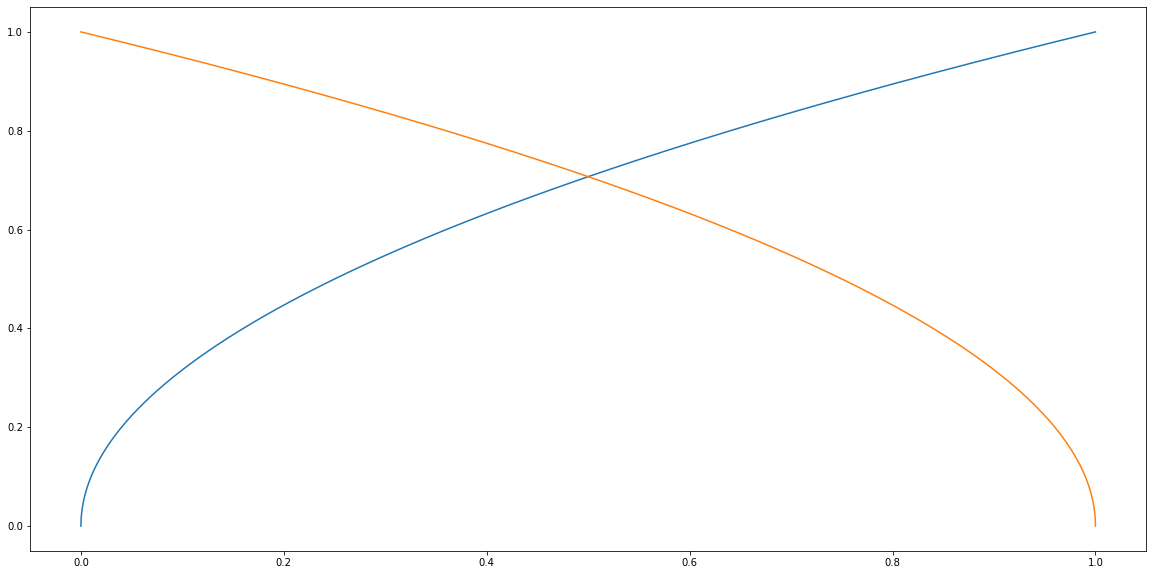

In [46]:
numOfSamples = 1*Fs

x = 2

ain = np.linspace(0,1,numOfSamples)
aout = np.linspace(1,0,numOfSamples)

fadeIn = ain**(1/x)
fadeOut = aout**(1/x)


plt.plot(t[:Fs],fadeIn,t[:Fs],fadeOut)

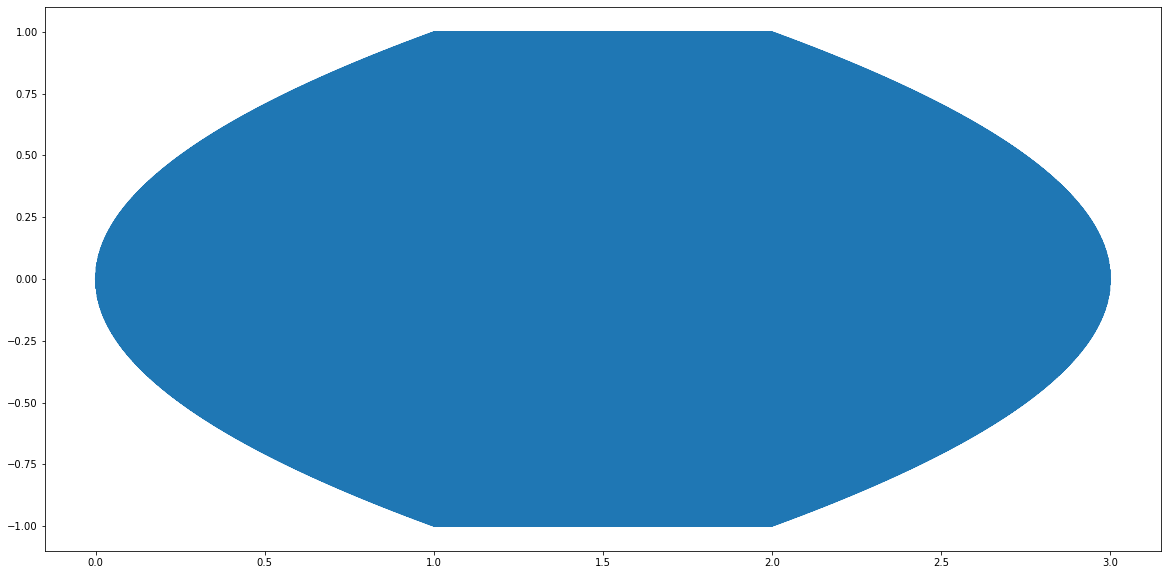

In [47]:
temp = in1
temp[:numOfSamples] = fadeIn * in1[:numOfSamples]
out = temp
out[-numOfSamples:] = fadeOut*in1[-numOfSamples:]
plt.plot(t,out)

In [48]:
Audio(data=out, rate=Fs)

### Amplitude modulation

In [51]:
filename = "textbookcode-master\Ch_13\RhythmGuitar.wav"
[carrier,Fs] = open_audio(filename)

In [52]:
Audio(data=carrier, rate=Fs)

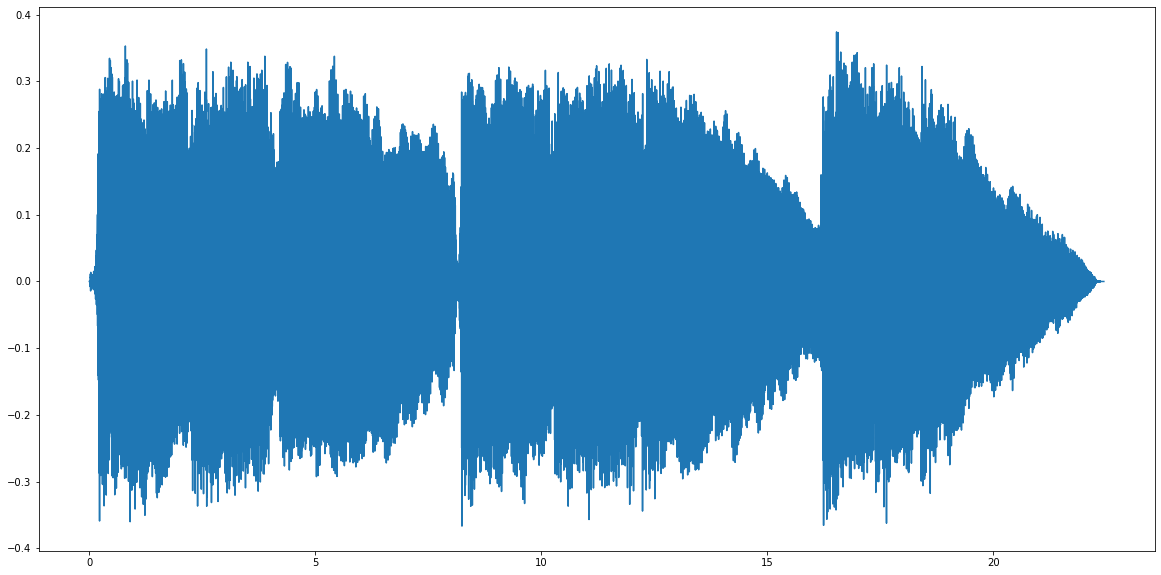

In [55]:
Ts = (1/Fs)
N = len(carrier)

t = np.arange(0,N,1) * Ts
plt.plot(t,carrier)

In [70]:
depth = 100
speed = 5
amp = 0.5*(depth/100)
offset  = 1 - amp

In [71]:
f = speed
phi = 0
sw = np.sin(2*np.pi*f*t + phi)
mod = amp*sw + offset

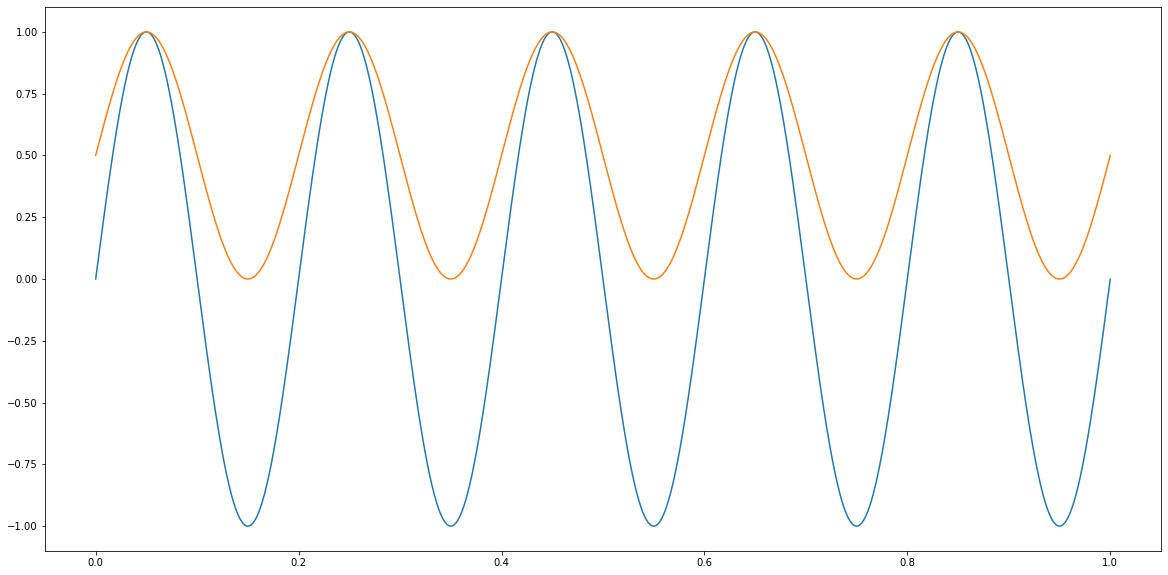

In [72]:
plt.plot(t[:Fs], sw[:Fs], t[:Fs],mod[:Fs])

In [74]:
output = carrier * mod

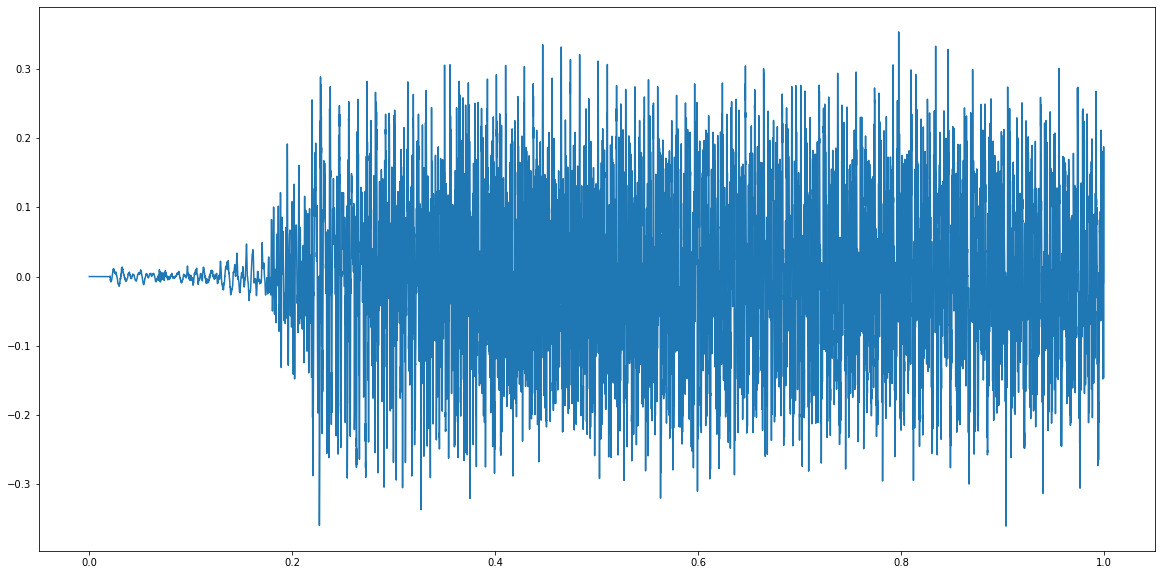

In [75]:
plt.plot(t[:Fs], carrier[:Fs])

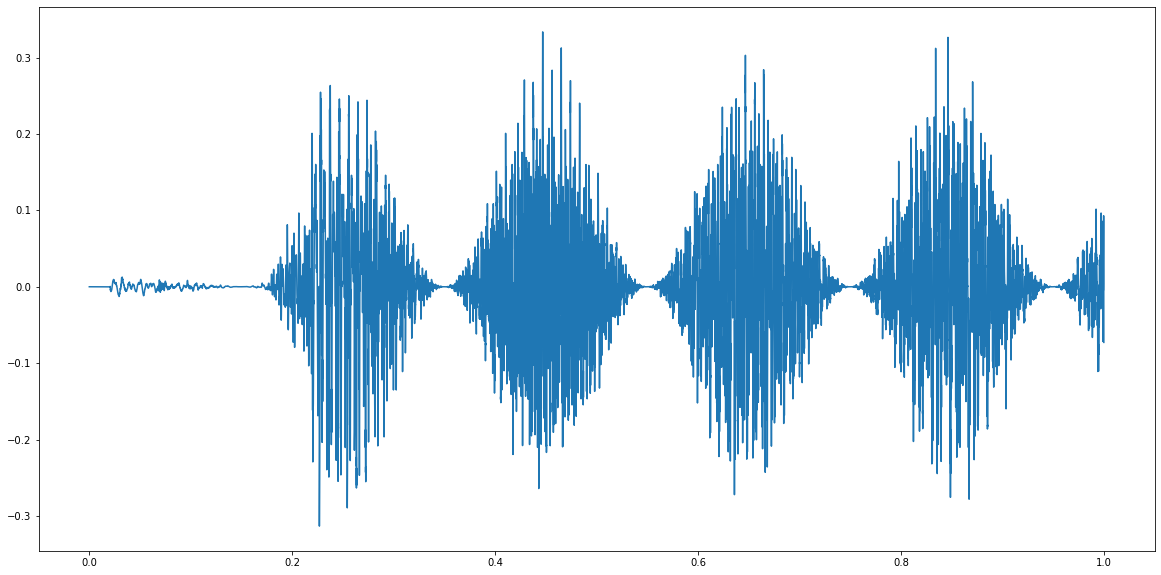

In [77]:
plt.plot(t[:Fs], output[:Fs])

In [78]:
Audio(data=output, rate=Fs)

In [79]:
Fs = 48000
Ts = 1/Fs
f = 1
t = np.arange(0,1,Ts)

In [91]:
knobValue = 10
lfo = signal.sawtooth(2*np.pi*t + np.pi/2, 0.5)
N = len(lfo)
lfoShape = np.zeros(N)

In [92]:
for n in range(0,N):
    if lfo[n] >= 0:
        lfoShape[n] = lfo[n]**(1/knobValue)
    else:
        lfoShape[n] = -1*np.abs(lfo[n])**(1/knobValue)

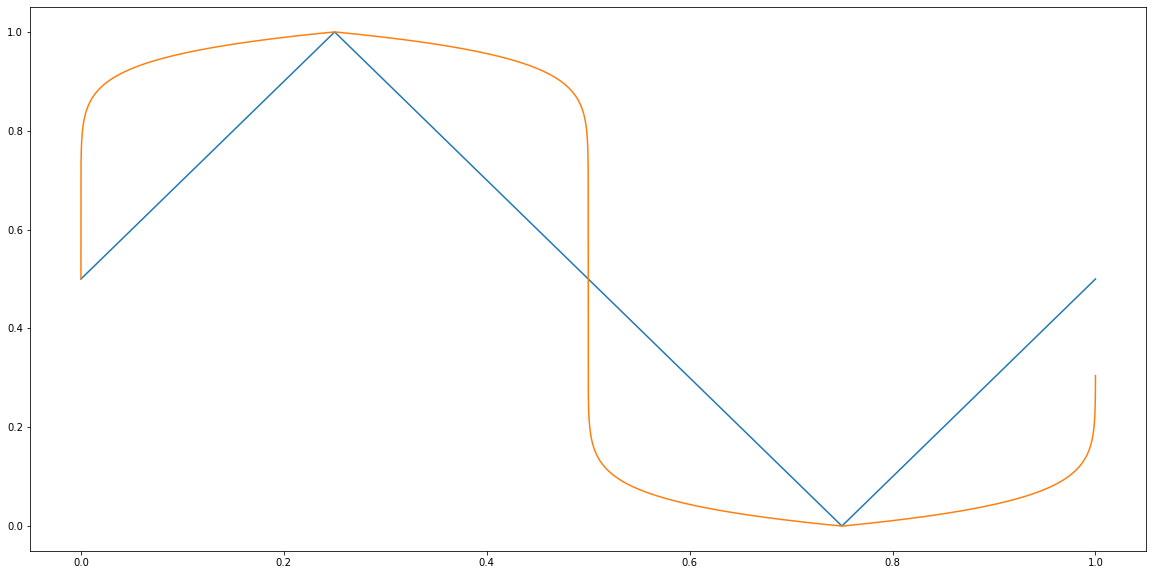

In [93]:
plt.plot(t, 0.5*lfo+0.5, t, 0.5*lfoShape+0.5)